In [1]:
import matplotlib.pyplot as plt
import pandas as pd
def print_banner():
    banner =  r''' 
_______  ________  ________  ________ ___  ________  ________  ________                              
|\   ____\|\   __  \|\   __  \|\  _____|\  \|\   ____\|\   __  \|\   ____\                             
\ \  \___|\ \  \|\  \ \  \|\  \ \  \__/\ \  \ \  \___|\ \  \|\  \ \  \___|_                            
 \ \  \  __\ \   _  _\ \   __  \ \   __\\ \  \ \  \    \ \   __  \ \_____  \                           
  \ \  \|\  \ \  \\  \\ \  \ \  \ \  \_| \ \  \ \  \____\ \  \ \  \|____|\  \                          
   \ \_______\ \__\\ _\\ \__\ \__\ \__\   \ \__\ \_______\ \__\ \__\____\_\  \                         
    \|_______|\|__|\|__|\|__|\|__|\|__|    \|__|\|_______|\|__|\|__|\_________\                        
 ________      ___    ___                                          \|_________|                        
|\   __  \    |\  \  /  /|                                                                             
\ \  \|\ /_   \ \  \/  / /                                                                             
 \ \   __  \   \ \    / /                                                                              
  \ \  \|\  \   \/  /  /                                                                               
   \ \_______\__/  / /                                                                                 
    \|_______|\___/ /                                                                                  
             \|___|/                                                                                   
 ___  __    _______   ___      ___ ___  ________           ________  ________  ________   ________     
|\  \|\  \ |\  ___ \ |\  \    /  /|\  \|\   ___  \        |\   ____\|\   __  \|\   ___  \|\   __  \    
\ \  \/  /|\ \   __/|\ \  \  /  / \ \  \ \  \\ \  \       \ \  \___|\ \  \|\  \ \  \\ \  \ \  \|\  \   
 \ \   ___  \ \  \_|/_\ \  \/  / / \ \  \ \  \\ \  \       \ \  \    \ \   __  \ \  \\ \  \ \  \\\  \  
  \ \  \\ \  \ \  \_|\ \ \    / /   \ \  \ \  \\ \  \       \ \  \____\ \  \ \  \ \  \\ \  \ \  \\\  \ 
   \ \__\\ \__\ \_______\ \__/ /     \ \__\ \__\\ \__\       \ \_______\ \__\ \__\ \__\\ \__\ \_______\
    \|__| \|__|\|_______|\|__|/       \|__|\|__| \|__|        \|_______|\|__|\|__|\|__| \|__|\|_______|
                                                                                                                                                                                                                                                                                             
                '''
    print(banner)
    print('indicar si es un data frame(en formato csv)')
def df_listas(df):
    x = input('Nombre de la columna para x: ')
    y = input('Nombre de la columna para y')
    dataframe = pd.read_csv(df)
    if x not in dataframe.columns or y not in dataframe.columns:
        raise ValueError(f"Las columnas {x} o {y} no existen en el DataFrame")
    columna_x = dataframe[x].tolist()
    columna_y = dataframe[y].tolist()
    datos_finales = []
    for i in range(len(columna_x)):
        datos_finales.append((columna_x[i],columna_y[i]))
    return datos_finales
def menu(datos):
    opcion = 1
    print_banner()
    df = input('Es un data frame y/n: ')
    while opcion != '0':
        print('Bienvenido a Graficas')
        print("""ingrese una opcion del menu.
                \n 1.- grafica de linea
                \n 2.- grafica multiples rectas
                \n 0.- salir""")
        opcion = input('')
        if opcion == '1':
            # conversion de un df a listas
            if df == 'y':
                datos_nuevos = df_listas(datos)
                datos = datos_nuevos
                
            print('Has elegido grafica de linea')
            print('ingresa las especificaciones de la grafica')
            titulo = input('Titulo: ')
            eje_x = input('Nombre del eje x: ')
            eje_y = input('Nombre del eje y: ')
            color = input('Color: ')
            tipo_linea = input('Tipo de linea: ')
            leyenda = input('leyenda: ')
            especificaciones = {'titulo': titulo,
                               'color': color,
                               'ejex': eje_x,
                               'ejey': eje_y,
                               'tipo_linea':tipo_linea,
                               'leyenda': leyenda}
            grafica1 = GraficaLinea(datos,especificaciones)
            try:
                grafica1.graficar()
            except ValueError:
                raise ValueError('El conjunto de datos es inconsistente')
            break
        if opcion == '2':
            print('Has elegido grafico de multiples rectas')
            print('ingresa las especificaciones de las graficas')
            especificaciones = []
            titulo = input('Titulo: ')
            eje_x = input('Nombre del eje x: ')
            eje_y = input('Nombre del eje y: ')
            datos_n = []
            for n in range(len(datos)):
                
                if df == 'y':
                    print('Datos obtenidos de un csv')
                    print(f'Especificaciones para la recta {n}')
                    datos_nuevos = df_lista(datos)
                datos_n.append(datos_nuevos)
                
                color = input('color: ')
                tipo_linea = input('tipo de linea: ')
                leyenda = input('leyenda: ')
                especificaciones_n = {'titulo': titulo,
                               'color': color,
                               'ejex': eje_x,
                               'ejey': eje_y,
                               'tipo_linea':tipo_linea,
                               'leyenda': leyenda}
                especificaciones.append(especificaciones_n)
            grafica2 = GraficaLinea(datos_n,especificaciones)
            grafica2.graficar_multiples()
                
                
                
            

In [4]:
class GraficaLinea:
    
    def __init__(self,datos, especificaciones):
        """
        Inicializa la clase GraficaLinea.

        :param datos: Lista de tuplas o listas, cada una representando una serie de datos (x, y).
        :param especificaciones: Diccionario con opciones para personalizar la gráfica:
                                 - 'titulo': Título de la gráfica.
                                 - 'ejes': Tupla con los nombres de los ejes (x, y).
                                 - 'color': Color de la línea.
                                 - 'tipo_linea': Tipo de línea (e.g., '-', '--', '-.', ':').
        """
        self.datos = datos
        self.especificaciones = especificaciones
    def graficar(self, save = 'n',tipo = 'p'):
        x = [x[0] for x in self.datos]
        y = [y[1] for y in self.datos]
        fig, ax = plt.subplots()
        if tipo == 'p':
            ax.plot(x, y, 
                    color = self.especificaciones['color'],
                    linestyle= self.especificaciones['tipo_linea'],
                    label = self.especificaciones['leyenda'])
        elif tipo == 's':
            ax.scatter(x, y, 
                    color = self.especificaciones['color'],
                    linestyle= self.especificaciones['tipo_linea'],
                    label = self.especificaciones['leyenda'])
            
        ax.set_title(self.especificaciones['titulo'])
        ax.set_xlim(min(x),max(x))
        ax.set_ylim(min(y),max(y))
        ax.set_xlabel(self.especificaciones['ejex'])
        ax.set_ylabel(self.especificaciones['ejey'])
        ax.legend()
        if save == 'y':
            plt.savefig(self.especificaciones.get('titulo', 'grafica') + '.jpg')
        ax.grid()
        plt.show()
        
    def graficar_multiples(self,save = 'n'):
        fig, ax = plt.subplots()
        for i, dato in enumerate(self.datos):
            x = [x[0] for x in dato]
            y = [y[1] for y in dato]
            ax.plot(x,y,color = self.especificaciones[i]['color'],
                        linestyle= self.especificaciones[i]['tipo_linea'],
                        label = self.especificaciones[i]['leyenda'])
        ax.set_title(self.especificaciones[0]['titulo'])
        ax.set_xlabel(self.especificaciones[0]['ejex'])
        ax.set_ylabel(self.especificaciones[0]['ejey'])
        ax.legend()
        if save == 'y':
            plt.savefig(self.especificaciones.get('titulo', 'grafica') + '.jpg')
        plt.show()
            
            
        
        
        

 
_______  ________  ________  ________ ___  ________  ________  ________                              
|\   ____\|\   __  \|\   __  \|\  _____|\  \|\   ____\|\   __  \|\   ____\                             
\ \  \___|\ \  \|\  \ \  \|\  \ \  \__/\ \  \ \  \___|\ \  \|\  \ \  \___|_                            
 \ \  \  __\ \   _  _\ \   __  \ \   __\\ \  \ \  \    \ \   __  \ \_____  \                           
  \ \  \|\  \ \  \\  \\ \  \ \  \ \  \_| \ \  \ \  \____\ \  \ \  \|____|\  \                          
   \ \_______\ \__\\ _\\ \__\ \__\ \__\   \ \__\ \_______\ \__\ \__\____\_\  \                         
    \|_______|\|__|\|__|\|__|\|__|\|__|    \|__|\|_______|\|__|\|__|\_________\                        
 ________      ___    ___                                          \|_________|                        
|\   __  \    |\  \  /  /|                                                                             
\ \  \|\ /_   \ \  \/  / /                                      

Es un data frame y/n:  n


Bienvenido a Graficas
ingrese una opcion del menu.
                
 1.- grafica de linea
                
 2.- grafica multiples rectas
                
 0.- salir


 1


Has elegido grafica de linea
ingresa las especificaciones de la grafica


Titulo:  Lineal
Nombre del eje x:  x
Nombre del eje y:  y
Color:  b
Tipo de linea:  --
leyenda:  f(x)=x**2


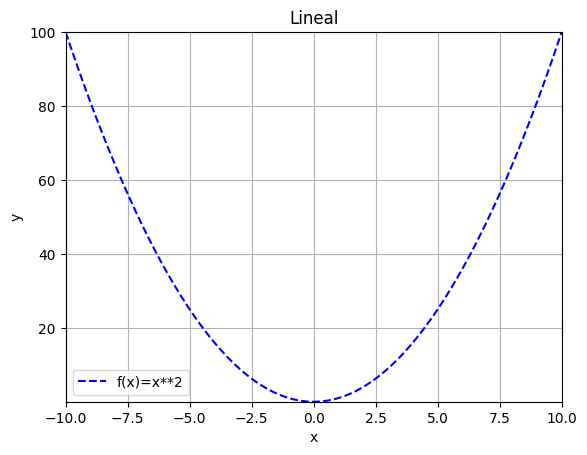

In [5]:
def lineal(n):
    from numpy import linspace
    data = linspace(-10,10,100)
    lista = []
    for i in data:
        lista.append((i,i**n))
    return lista
datos = lineal(2)
#datos.append(lineal(2))
#datos.append(lineal(3))
menu(datos)